# Libraries

In [30]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report
# from sklearn.metrics import roc_curve
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import average_precision_score
# from sklearn.model_selection import cross_val_score # --WIP

# Model Dictionary

In [2]:
model_dict = {
    "LinearRegression": LinearRegression(),
    "LogisticRegression": LogisticRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "SVC": SVC(),
    "SVR": SVR(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestClassifier": RandomForestClassifier(),
    "RandomForestRegressor": RandomForestRegressor(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "KNeighborsRegressor": KNeighborsRegressor()
}

# Classification

## Model Pipeline
We will get this from front end

In [22]:
model_pipeline = [
    {
        "name": "TrainTestSplit",
        "params": [
            {
                "name": "test_size",
                "value": 0.2
            },
            {
                "name": "random_state",
                "value": 42
            },
            {
                "name": "output",
                "value": "variety"
            }
        ]
    },
    {
        "name": "RandomForestClassifier",
        "params": []
    }
]

## Data

In [23]:
df = pd.read_csv('./uploads/data_preprocessed.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Train Test Split

In [24]:
output_col = model_pipeline[0]['params'][2]['value']
test_size = model_pipeline[0]['params'][0]['value']
random_state = model_pipeline[0]['params'][1]['value']
X_train, X_test, y_train, y_test = train_test_split(df.drop(output_col, axis=1), df[output_col], test_size=test_size, random_state=random_state)

## Model Fitting

In [25]:
model = model_dict[model_pipeline[1]['name']]
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

## Evaluation Metrics

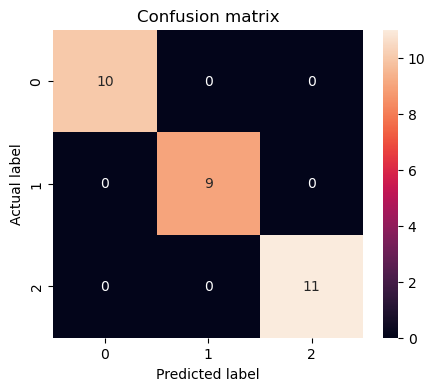

In [26]:
#Confusion matrix

cm = confusion_matrix(y_test, model.predict(X_test))

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [28]:
# Classification report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# ROC curve and AUC --WIP

In [32]:
# Precision Recall Curve --WIP

# Regression

## Model Pipeline
We will get this from front end

In [12]:
model_pipeline = [
    {
        "name": "TrainTestSplit",
        "params": [
            {
                "name": "test_size",
                "value": 0.2
            },
            {
                "name": "random_state",
                "value": 42
            },
            {
                "name": "output",
                "value": "medv"
            }
        ]
    },
    {
        "name": "RandomForestRegressor",
        "params": []
    }
]

## Data

In [13]:
df = pd.read_csv('./uploads/data_regression.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Train Test Split

In [14]:
output_col = model_pipeline[0]['params'][2]['value']
test_size = model_pipeline[0]['params'][0]['value']
random_state = model_pipeline[0]['params'][1]['value']
X_train, X_test, y_train, y_test = train_test_split(df.drop(output_col, axis=1), df[output_col], test_size=test_size, random_state=random_state)

## Model Fitting

In [15]:
model = model_dict[model_pipeline[1]['name']]
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8829096389547154

## Evaluation Metrics

In [18]:
y_pred = model.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

MAE: 2.079186274509805
MSE: 8.586679147058826
R2: 0.8829096389547154
